In [318]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
!pip install nltk
nltk.download("punkt")
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [319]:
df = pd.read_csv("/content/spam.csv", encoding='ISO-8859-1')


In [320]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
934,spam,Dear Matthew please call 09063440451 from a la...,NaN,NaN,NaN
4981,ham,Slept? I thinkThis time ( &lt;#&gt; pm) is no...,NaN,NaN,NaN
4231,ham,I'm at home. Please call,NaN,NaN,NaN
3188,ham,X2 &lt;#&gt; . Are you going to get that,NaN,NaN,NaN
1676,ham,"Yeah, that's fine! It's å£6 to get in, is that...",NaN,NaN,NaN


In [321]:
df.shape

(5572, 5)

#Data Cleaning
#EDA
# Text Preprocessing
#Evaluation
#Improvement
#Website
#Deploy

In [322]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [323]:
df.drop(columns = [ "Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], inplace = True)

In [324]:
df.sample(5)

,v1,v2
2481,ham,K.:)do it at evening da:)urgent:)
3781,ham,How r Ì_ going to send it to me?
2703,ham,Yup no more already... Thanx 4 printing n hand...
4881,ham,As usual u can call me ard 10 smth.
1295,ham,TELL HER I SAID EAT SHIT.


In [332]:
df.rename(columns = {"v1" : "target", "v2" : "text"} , inplace = True)
df.sample(5)

,target,text
1515,0,I wonder if you'll get this text?
1621,0,Living is very simple.. Loving is also simple....
4954,0,Doing my masters. When will you buy a bb cos i...
1494,0,It has everything to do with the weather. Keep...
3900,0,That depends. How would you like to be treated...


In [333]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df["target"] = encoder.fit_transform(df["target"])

In [334]:
df.isnull().sum()

target    0
text      0
dtype: int64

In [335]:
df.duplicated().sum()

0

In [336]:
df = df.drop_duplicates(keep = "first")

In [337]:
df["target"].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x7efe7db9fac0>,
 [Text(-1.0144997251399075, 0.42519443516002464, 'ham'),
  Text(1.014499764949479, -0.4251943401757036, 'spam')],
 [Text(-0.5533634864399495, 0.23192423736001339, '87.37'),
  Text(0.5533635081542612, -0.23192418555038377, '12.63')])

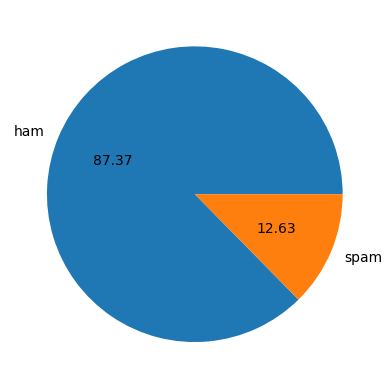

In [338]:
plt.pie(df["target"].value_counts(),labels = ["ham", "spam"],autopct = "%0.2f")

imbalalce data

In [339]:
df["num_characters"] = df["text"].apply(len)

In [340]:
df.head(3)

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155


In [341]:
df["num_words"] = df["text"].apply(lambda x : len(nltk.word_tokenize(x)))


In [342]:
df["num_sentences"] = df["text"].apply(lambda x : len(nltk.sent_tokenize(x)))

In [343]:
df.head(1)

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2


In [344]:
df[["num_characters" , "num_words", "num_sentences"]].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [345]:
df[df["target"]== 0][["num_characters" , "num_words", "num_sentences"]].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [346]:
df[df["target"]== 1][["num_characters" , "num_words", "num_sentences"]].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


<Axes: xlabel='num_characters', ylabel='Count'>

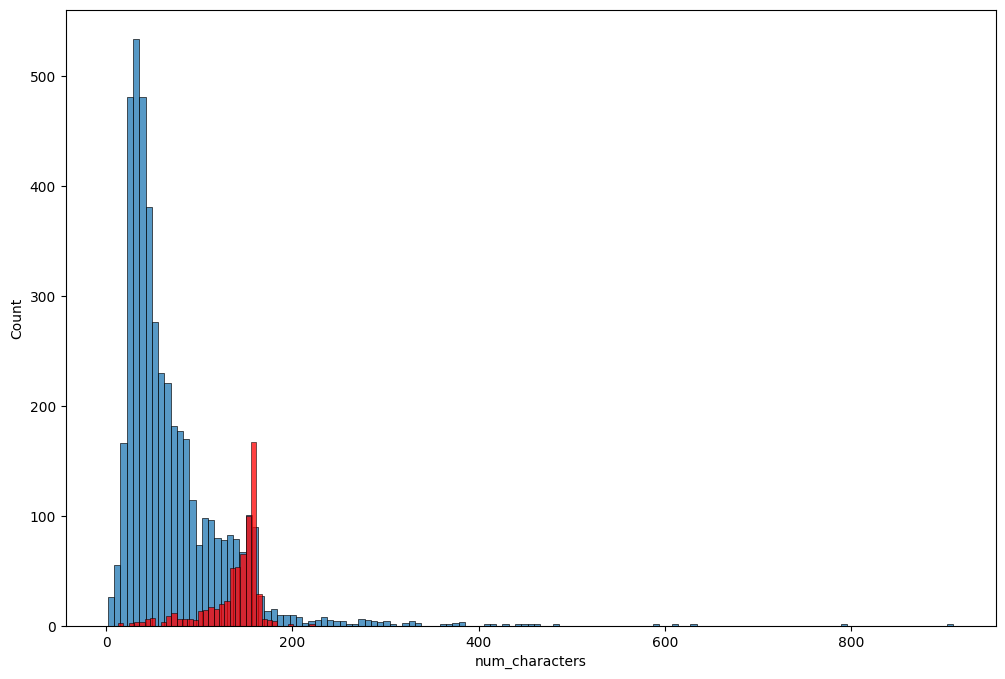

In [347]:
plt.figure(figsize= (12,8))
sns.histplot(df[df["target"]==0]["num_characters"])
sns.histplot(df[df["target"]==1]["num_characters"],color = "red")

<Axes: xlabel='num_words', ylabel='Count'>

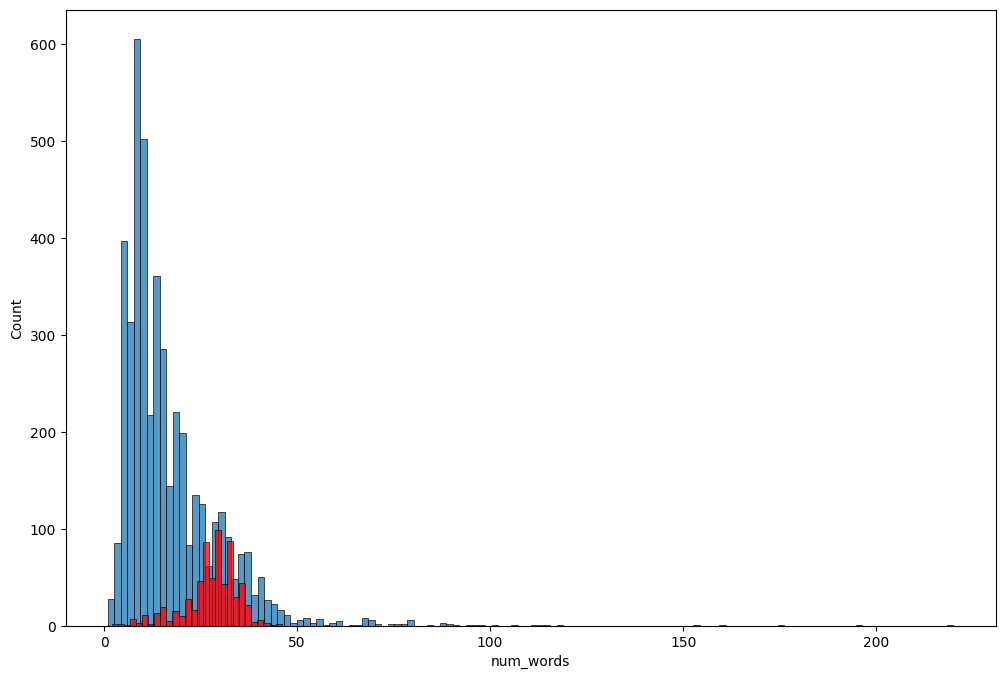

In [348]:
plt.figure(figsize= (12,8))
sns.histplot(df[df["target"]==0]["num_words"])
sns.histplot(df[df["target"]==1]["num_words"],color = "red")

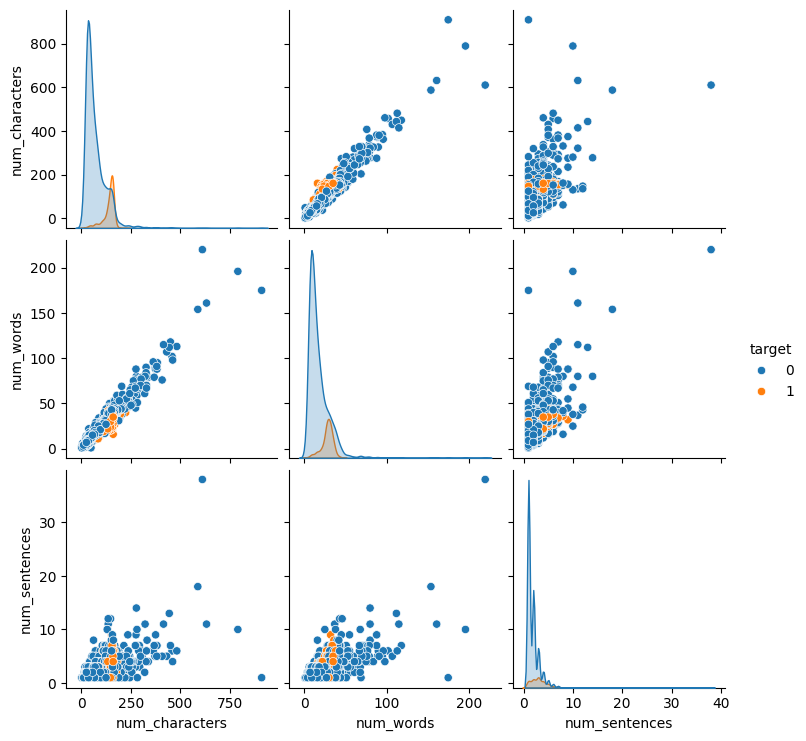

In [349]:
sns.pairplot(df,hue = "target")

<Axes: >

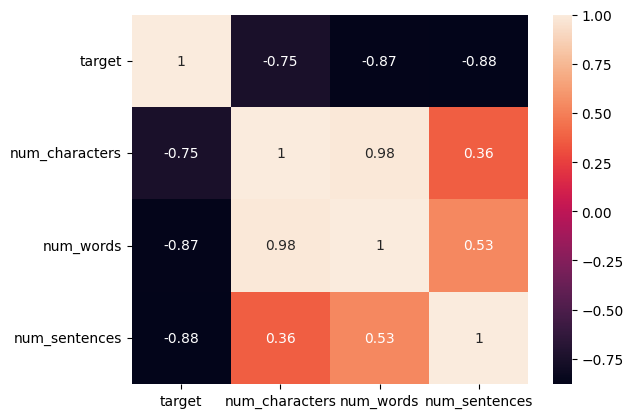

In [350]:
numeric_df = df.select_dtypes(include=[np.number])
corr_matrix = numeric_df.corr()
sns.heatmap(corr_matrix.corr(),annot = True)

##Data Preprocessing

Lower Case

Tokenization

Removing special Characters

Removing stop words and punctuation

Stemming

In [351]:
from nltk.corpus import stopwords
stopwords.words("english")

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [352]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [353]:
def transform_text(text):
  text = text.lower()
  text = nltk.word_tokenize(text)

  y =  []
  for i in text:
    if i.isalnum():
      y.append(i)
  text = y[:]
  y.clear()

  for i in text:
    if i not in stopwords.words("english") and i not in string.punctuation:
      y.append(i)
  text = y[:]
  y.clear()

  for i in text:
    y.append(ps.stem(i))


  return y

In [354]:
transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")

['gon',
 'na',
 'home',
 'soon',
 'want',
 'talk',
 'stuff',
 'anymor',
 'tonight',
 'k',
 'cri',
 'enough',
 'today']

In [355]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem("flied")

'fli'

In [356]:
df["text"][10]

"I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."

In [357]:
df["transformed_text"]= df["text"].apply(transform_text)

In [358]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,"[go, jurong, point, crazi, avail, bugi, n, gre..."
1,0,Ok lar... Joking wif u oni...,29,8,2,"[ok, lar, joke, wif, u, oni]"
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,"[free, entri, 2, wkli, comp, win, fa, cup, fin..."
3,0,U dun say so early hor... U c already then say...,49,13,1,"[u, dun, say, earli, hor, u, c, alreadi, say]"
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,"[nah, think, goe, usf, live, around, though]"


In [359]:
df['transformed_text'] = df['transformed_text'].astype(str)

In [360]:
from wordcloud import WordCloud
wc = WordCloud(width =500 , height=500 , min_font_size = 10, background_color = "white")

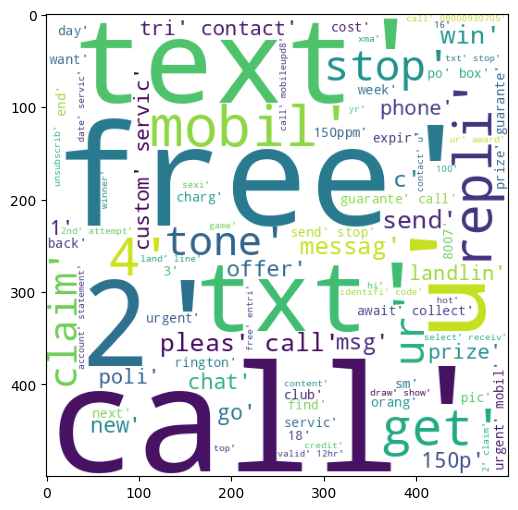

In [361]:
plt.figure(figsize = (12, 6))
hammingam_wc = wc.generate(df[df["target"]== 0]["transformed_text"].str.cat(sep = " "))
plt.imshow(ham_wc)

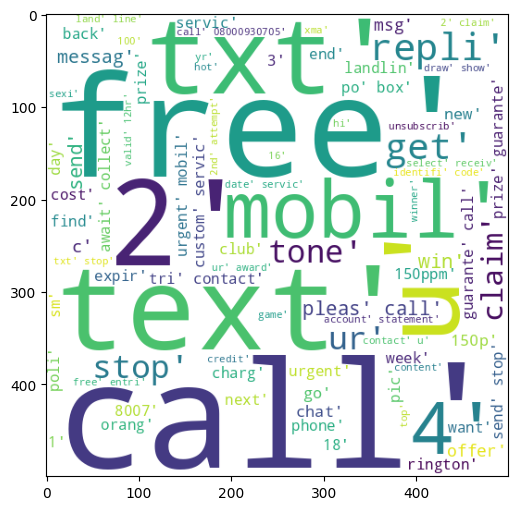

In [362]:
spam_wc = wc.generate(df[df["target"]== 1]["transformed_text"].str.cat(sep = " "))
plt.figure(figsize = (12, 6))
plt.imshow(spam_wc)

In [363]:
df.head(1)

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,"['go', 'jurong', 'point', 'crazi', 'avail', 'b..."


In [364]:
spam_corpus = []
for msg in df[df["target"]==1]["transformed_text"].tolist() :
  for words in msg.split():
    spam_corpus.append(words)


In [365]:
len(spam_corpus)

9939

In [366]:
from collections import Counter
pd.DataFrame(Counter(spam_corpus).most_common(30))

,0,1
0,"'call',",305
1,"'free',",158
2,"'2',",154
3,"'txt',",137
4,"'text',",118
5,"'mobil',",106
6,"'u',",99
7,"'repli',",99
8,"'ur',",99
9,"'claim',",96


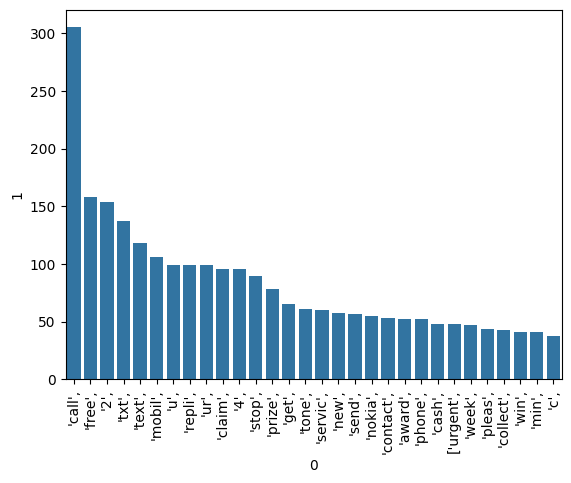

In [367]:
sns.barplot(x = pd.DataFrame(Counter(spam_corpus).most_common(30))[0],y = pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation = "vertical")
plt.show()

In [368]:
ham_corpus = []
for msg in df[df["target"]==0]["transformed_text"].tolist() :
  for words in msg.split():
    ham_corpus.append(words)

In [369]:
len(ham_corpus)

35413

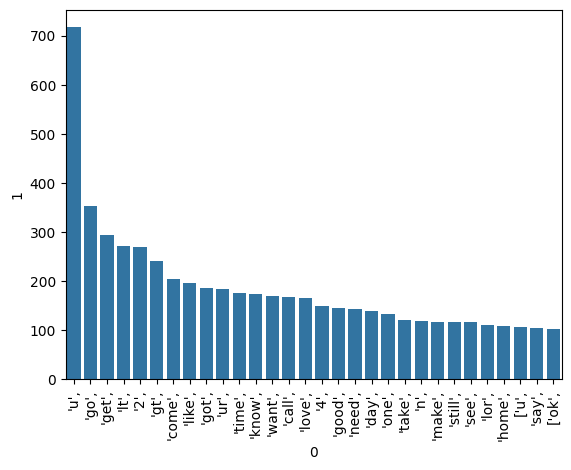

In [370]:
sns.barplot(x = pd.DataFrame(Counter(ham_corpus).most_common(30))[0],y = pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation = "vertical")
plt.show()

Modeling Building

In [371]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer()

In [372]:
X = tfidf.fit_transform(df["transformed_text"]).toarray()

In [373]:
X.shape

(5169, 6708)

In [374]:
y = df["target"].values

In [375]:
from sklearn.model_selection import train_test_split

In [376]:
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size= 0.2, random_state = 2)


In [377]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix,precision_score

In [378]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [379]:
gnb.fit(X_train , y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test , y_pred1))
print(confusion_matrix(y_test , y_pred1))
print(precision_score(y_test , y_pred1))

0.8762088974854932
[[793 103]
 [ 25 113]]
0.5231481481481481


In [380]:
mnb.fit(X_train , y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test , y_pred2))
print(confusion_matrix(y_test , y_pred2))
print(precision_score(y_test , y_pred2))

0.9593810444874274
[[896   0]
 [ 42  96]]
1.0


In [381]:
bnb.fit(X_train , y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test , y_pred3))
print(confusion_matrix(y_test , y_pred3))
print(precision_score(y_test , y_pred3))

0.9700193423597679
[[893   3]
 [ 28 110]]
0.9734513274336283


# tfidf -- > MNB

In [382]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [383]:

svc = SVC(kernel = "sigmoid" , gamma = 1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth = 5)
lrc = LogisticRegression(solver = "liblinear" , penalty = "l1")
rfc = RandomForestClassifier(n_estimators = 50 , random_state = 2)
abc = AdaBoostClassifier(n_estimators = 50 , random_state = 2)
bc = BaggingClassifier(n_estimators= 50 , random_state = 2)
etc = ExtraTreesClassifier(n_estimators=50 , random_state = 2)
gbdt = GradientBoostingClassifier(n_estimators=50 , random_state = 2)
xgb = XGBClassifier(n_estimators=50 , random_state = 2)

In [384]:
clfs = {
    "SVC" : svc,
    "KN"  : knc,
    "NB"  : mnb,
    "DT"  : dtc,
    "LR"  : lrc,
    "RF"  : rfc,
    "adaBoost" : abc,
    "BgC"  : bc,
    "ETC"  : etc,
    "xgb" : xgb,

    }

In [385]:
def train_classifier(clf,X_train, y_train, X_test, y_test ):
  clf.fit(X_train,y_train)
  y_pred =clf.predict(X_test)
  accuracy = accuracy_score(y_test, y_pred)
  precision = precision_score(y_test,y_pred)

  return accuracy,precision

In [386]:
train_classifier(svc, X_train, y_train, X_test, y_test)

(0.9729206963249516, 0.9741379310344828)

In [387]:
accuracy_scores = []
precision_scores = []

for name, clf in clfs.items():

  current_accuracy,current_precision = train_classifier(clf, X_train, y_train, X_test, y_test )
  print("For", name)
  print("Accuracy -" , current_accuracy)
  print("Precision" , current_precision)

  accuracy_scores.append(current_accuracy)
  precision_scores.append(current_precision)

For SVC
Accuracy - 0.9729206963249516
Precision 0.9741379310344828
For KN
Accuracy - 0.9003868471953579
Precision 1.0
For NB
Accuracy - 0.9593810444874274
Precision 1.0
For DT
Accuracy - 0.9352030947775629
Precision 0.8380952380952381
For LR
Accuracy - 0.9516441005802708
Precision 0.94
For RF
Accuracy - 0.971953578336557
Precision 1.0
For adaBoost
Accuracy - 0.9613152804642167
Precision 0.9454545454545454
For BgC
Accuracy - 0.9584139264990329
Precision 0.8625954198473282
For ETC
Accuracy - 0.9729206963249516
Precision 0.9824561403508771
For xgb
Accuracy - 0.9729206963249516
Precision 0.9435483870967742


In [388]:
performance_df = pd.DataFrame({"Algorithm" : clfs.keys() ,
                               "Accuracy" : accuracy_scores,
                              "Precision"  : precision_scores}).sort_values("Accuracy", ascending = False)

In [389]:
performance_df

,Algorithm,Accuracy,Precision
0,SVC,0.972921,0.974138
8,ETC,0.972921,0.982456
9,xgb,0.972921,0.943548
5,RF,0.971954,1.000000
6,adaBoost,0.961315,0.945455
2,NB,0.959381,1.000000
7,BgC,0.958414,0.862595
4,LR,0.951644,0.940000
3,DT,0.935203,0.838095
1,KN,0.900387,1.000000


In [390]:
performance_df1 = pd.melt(performance_df , id_vars = "Algorithm")


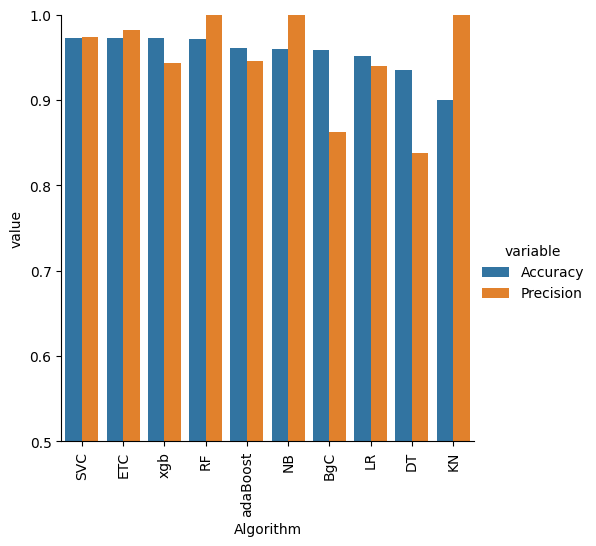

In [391]:
sns.catplot( x = 'Algorithm' , y = "value",
            hue = "variable", data = performance_df1, kind="bar",height = 5)
plt.ylim(0.5 , 1.0)
plt.xticks(rotation = "vertical")
plt.show()

Improving Model and Performance

1. Change the max_features parameter

In [392]:
temp_df = pd.DataFrame({"Algorithm" : clfs.keys(),
                       "Accuracy_max_ft_3000" : accuracy_scores,
                       "Precision_max_ft_3000" : precision_scores,})

with max_ft_3000 and without max_ft_3000

In [393]:
performance_df.merge(temp_df , on = "Algorithm")

,Algorithm,Accuracy,Precision,Accuracy_max_ft_3000,Precision_max_ft_3000
0,SVC,0.972921,0.974138,0.972921,0.974138
1,ETC,0.972921,0.982456,0.972921,0.982456
2,xgb,0.972921,0.943548,0.972921,0.943548
3,RF,0.971954,1.000000,0.971954,1.000000
4,adaBoost,0.961315,0.945455,0.961315,0.945455
5,NB,0.959381,1.000000,0.959381,1.000000
6,BgC,0.958414,0.862595,0.958414,0.862595
7,LR,0.951644,0.940000,0.951644,0.940000
8,DT,0.935203,0.838095,0.935203,0.838095
9,KN,0.900387,1.000000,0.900387,1.000000


In [394]:
temp_df

,Algorithm,Accuracy_max_ft_3000,Precision_max_ft_3000
0,SVC,0.972921,0.974138
1,KN,0.900387,1.000000
2,NB,0.959381,1.000000
3,DT,0.935203,0.838095
4,LR,0.951644,0.940000
5,RF,0.971954,1.000000
6,adaBoost,0.961315,0.945455
7,BgC,0.958414,0.862595
8,ETC,0.972921,0.982456
9,xgb,0.972921,0.943548


In [395]:
#Voting Classifier

svc = SVC(kernel = "sigmoid" , gamma = 1.0 , probability = True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators = 50 , random_state = 2)

from sklearn.ensemble import VotingClassifier

In [398]:
voting = VotingClassifier(estimators = [("svm", svc), ("nb", mnb), ("et" , etc)], voting = "soft")

In [399]:
 voting.fit(X_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [400]:
y_pred = voting.predict(X_test)
print("Accuracy" , accuracy_score(y_test , y_pred))
print("Precision" , precision_score(y_test , y_pred))


Accuracy 0.9787234042553191
Precision 1.0


In [401]:
#Applying stacking
estimators = [("svm" , svc) , ("nb" , mnb), ("et" , etc)]
final_estimator = RandomForestClassifier()


In [404]:
from sklearn.ensemble import StackingClassifier
clf = StackingClassifier(estimators = estimators , final_estimator=final_estimator)


In [406]:
clf.fit(X_train , y_train)
y_pred = clf.predict(X_test)
print("Accuracy" , accuracy_score(y_test , y_pred))
print("Precision", precision_score(y_test , y_pred))

Accuracy 0.9825918762088974
Precision 0.9615384615384616


In [415]:
import pickle
pickle.dump(tfidf,open("vectorizer.pkl", "wb"))
pickle.dump(mnb,open("model.pkl" , "wb"))

['model.pkl']

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

NameError: name 'corpus' is not defined

["['free',",
 "'entri',",
 "'2',",
 "'wkli',",
 "'comp',",
 "'win',",
 "'fa',",
 "'cup',",
 "'final',",
 "'tkt',",
 "'21st',",
 "'may',",
 "'text',",
 "'fa',",
 "'87121',",
 "'receiv',",
 "'entri',",
 "'question',",
 "'std',",
 "'txt',",
 "'rate',",
 "'c',",
 "'appli',",
 "'08452810075over18']",
 "['freemsg',",
 "'hey',",
 "'darl',",
 "'3',",
 "'week',",
 "'word',",
 "'back',",
 "'like',",
 "'fun',",
 "'still',",
 "'tb',",
 "'ok',",
 "'xxx',",
 "'std',",
 "'chg',",
 "'send',",
 "'rcv']",
 "['winner',",
 "'valu',",
 "'network',",
 "'custom',",
 "'select',",
 "'receivea',",
 "'prize',",
 "'reward',",
 "'claim',",
 "'call',",
 "'claim',",
 "'code',",
 "'kl341',",
 "'valid',",
 "'12',",
 "'hour']",
 "['mobil',",
 "'11',",
 "'month',",
 "'u',",
 "'r',",
 "'entitl',",
 "'updat',",
 "'latest',",
 "'colour',",
 "'mobil',",
 "'camera',",
 "'free',",
 "'call',",
 "'mobil',",
 "'updat',",
 "'co',",
 "'free',",
 "'08002986030']",
 "['six',",
 "'chanc',",
 "'win',",
 "'cash',",
 "'100',",
 "'pound'

# LSTM

In [425]:
df.head(1)

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,"['go', 'jurong', 'point', 'crazi', 'avail', 'b..."


In [422]:
import tensorflow as tf

In [424]:
tf.__version__

'2.15.0'

In [481]:
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense,Dropout

In [428]:
voc_size = 5000

Onehot Representation

In [434]:
X = df.drop(columns = ["num_words", "num_sentences", "transformed_text" ])

In [435]:
X.shape

(5169, 3)

In [436]:
messages = X.copy()

In [437]:
messages.reset_index(inplace = True)

In [438]:
import re
from nltk.corpus import stopwords

In [456]:

ps = PorterStemmer()
corpus = []

for i in range(0 , len(messages)):

  review = re.sub("[^a-zA-Z]"," ", messages["text"][i])
  review = review.lower()
  review = review.split()

  review = [ps.stem(word) for word in review if not word in stopwords.words("english")]
  review = " ".join(review)
  corpus.append(review)


In [447]:
onehot_rpr = [one_hot(words, voc_size)for words in corpus]

In [448]:
onehot_rpr

[[1885,
  2496,
  747,
  138,
  324,
  904,
  1279,
  549,
  393,
  4033,
  1876,
  1659,
  685,
  2669,
  2656,
  3695],
 [4649, 371, 3947, 3754, 2707, 144],
 [4041,
  592,
  3254,
  1914,
  4080,
  2014,
  1715,
  935,
  2533,
  3902,
  3898,
  1562,
  2014,
  4470,
  592,
  4971,
  4945,
  4097,
  2332,
  57,
  2336],
 [2707, 4364, 4976, 2273, 3149, 2707, 57, 3079, 4976],
 [3123, 816, 862, 2729, 4966, 2153, 1457],
 [206,
  3020,
  2509,
  1601,
  1058,
  890,
  2560,
  2757,
  2178,
  2874,
  4649,
  4088,
  4945,
  3317,
  3958,
  1074],
 [1602, 1991, 2560, 3637, 1071, 2560, 3876, 3867],
 [1774,
  1180,
  3850,
  3850,
  4435,
  4638,
  788,
  3370,
  3485,
  138,
  875,
  704,
  47,
  4292,
  138],
 [4215,
  667,
  462,
  3071,
  2331,
  3972,
  2315,
  2244,
  2280,
  1375,
  2280,
  2630,
  451,
  3330,
  4754],
 [2052,
  3486,
  2707,
  2416,
  1500,
  3838,
  4759,
  2561,
  2052,
  653,
  4041,
  1375,
  2052,
  3838,
  2167,
  4041],
 [2099, 3610, 2711, 3866, 2335, 2300, 383

In [465]:
sent_length = 30
embedded_docs = pad_sequences(onehot_rpr , padding = "pre", maxlen = sent_length)
print(embedded_docs)

[[   0    0    0 ... 2669 2656 3695]
 [   0    0    0 ... 3754 2707  144]
 [   0    0    0 ... 2332   57 2336]
 ...
 [   0    0    0 ...  749 4313 4586]
 [   0    0    0 ... 2926 1082 4041]
 [   0    0    0 ... 3895 1025 3959]]


In [466]:
embedded_docs[0]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0, 1885, 2496,  747,  138,  324,  904, 1279,  549,
        393, 4033, 1876, 1659,  685, 2669, 2656, 3695], dtype=int32)

In [490]:
#Model
embedding_vector_features = 80
model= Sequential()
model.add(Embedding(voc_size, embedding_vector_features, input_length = sent_length))
model.add(Dropout(0.3))
model.add(LSTM(100))
model.add(Dropout(0.3))
model.add(Dense(1, activation = "sigmoid"))
model.compile(loss = "binary_crossentropy", optimizer = "adam", metrics = ["accuracy"])
print(model.summary())

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_6 (Embedding)     (None, 30, 80)            400000    
                                                                 
 dropout_2 (Dropout)         (None, 30, 80)            0         
                                                                 
 lstm_4 (LSTM)               (None, 100)               72400     
                                                                 
 dropout_3 (Dropout)         (None, 100)               0         
                                                                 
 dense_4 (Dense)             (None, 1)                 101       
                                                                 
Total params: 472501 (1.80 MB)
Trainable params: 472501 (1.80 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [470]:
len(embedded_docs),y.shape

(5169, (5169,))

In [471]:

X_final = np.array(embedded_docs)
y_final = np.array(y)

In [472]:
X_final.shape, y_final.shape

((5169, 30), (5169,))

In [473]:
X_train1, X_test1 , y_train1, y_test1 = train_test_split(X_final , y_final,  test_size = 0.33 , random_state = 42)

Model Training

In [474]:
model.fit(X_train1 ,y_train1,validation_data=(X_test1 , y_test1),epochs = 10 ,batch_size =64)

Epoch 1/10
55/55 [==============================] - 13s 128ms/step - loss: 0.3113 - accuracy: 0.9038 - val_loss: 0.1448 - val_accuracy: 0.9490
Epoch 2/10
55/55 [==============================] - 8s 143ms/step - loss: 0.0748 - accuracy: 0.9830 - val_loss: 0.0609 - val_accuracy: 0.9789
Epoch 3/10
55/55 [==============================] - 6s 116ms/step - loss: 0.0318 - accuracy: 0.9905 - val_loss: 0.0648 - val_accuracy: 0.9824
Epoch 4/10
55/55 [==============================] - 6s 119ms/step - loss: 0.0158 - accuracy: 0.9954 - val_loss: 0.0584 - val_accuracy: 0.9830
Epoch 5/10
55/55 [==============================] - 7s 120ms/step - loss: 0.0086 - accuracy: 0.9977 - val_loss: 0.0719 - val_accuracy: 0.9818
Epoch 6/10
55/55 [==============================] - 5s 99ms/step - loss: 0.0051 - accuracy: 0.9991 - val_loss: 0.0815 - val_accuracy: 0.9812
Epoch 7/10
55/55 [==============================] - 6s 108ms/step - loss: 0.0035 - accuracy: 0.9991 - val_loss: 0.0847 - val_accuracy: 0.9824
Epoch 

In [491]:
y_pred1 = model.predict(X_test1)


54/54 [==============================] - 2s 16ms/step


In [488]:
confusion_matrix(y_test , y_pred)

array([[891,   5],
       [ 13, 125]])

In [489]:
accuracy_score(y_test , y_pred)

0.9825918762088974